# 第9章 EM算法及其推广

## Expectation Maximization algorithm

### Maximum likehood function

[likehood & maximum likehood](http://fangs.in/post/thinkstats/likelihood/)

EM算法就是根据已给的事件发生序列结果往前推事件发生的概率，三硬币模型，抛硬币a，正面朝上抛b,反面朝上抛c，正面结果为1，反面为0，根据最后的结果序列推a,b,c正面朝上的概率。贝叶斯


1．EM算法是含有隐变量的概率模型极大似然估计或极大后验概率估计的迭代算法。含有隐变量的概率模型的数据表示为$\theta$ )。这里，$Y$是观测变量的数据，$Z$是隐变量的数据，$\theta$ 是模型参数。EM算法通过迭代求解观测数据的对数似然函数${L}(\theta)=\log {P}(\mathrm{Y} | \theta)$的极大化，实现极大似然估计。每次迭代包括两步：

$E$步，求期望，即求$logP\left(Z | Y, \theta\right)$ )关于$ P\left(Z | Y, \theta^{(i)}\right)$)的期望：

$$Q\left(\theta, \theta^{(i)}\right)=\sum_{Z} \log P(Y, Z | \theta) P\left(Z | Y, \theta^{(i)}\right)$$
称为$Q$函数，这里$\theta^{(i)}$是参数的现估计值；

$M$步，求极大，即极大化$Q$函数得到参数的新估计值：

$$\theta^{(i+1)}=\arg \max _{\theta} Q\left(\theta, \theta^{(i)}\right)$$
 
在构建具体的EM算法时，重要的是定义$Q$函数。每次迭代中，EM算法通过极大化$Q$函数来增大对数似然函数${L}(\theta)$。

2．EM算法在每次迭代后均提高观测数据的似然函数值，即

$$P\left(Y | \theta^{(i+1)}\right) \geqslant P\left(Y | \theta^{(i)}\right)$$

在一般条件下EM算法是收敛的，但不能保证收敛到全局最优。

3．EM算法应用极其广泛，主要应用于含有隐变量的概率模型的学习。高斯混合模型的参数估计是EM算法的一个重要应用，下一章将要介绍的隐马尔可夫模型的非监督学习也是EM算法的一个重要应用。

4．EM算法还可以解释为$F$函数的极大-极大算法。EM算法有许多变形，如GEM算法。GEM算法的特点是每次迭代增加$F$函数值（并不一定是极大化$F$函数），从而增加似然函数值。


> 在统计学中，似然函数（likelihood function，通常简写为likelihood，似然）是一个非常重要的内容，在非正式场合似然和概率（Probability）几乎是一对同义词，但是在统计学中似然和概率却是两个不同的概念。概率是在特定环境下某件事情发生的可能性，也就是结果没有产生之前依据环境所对应的参数来预测某件事情发生的可能性，比如抛硬币，抛之前我们不知道最后是哪一面朝上，但是根据硬币的性质我们可以推测任何一面朝上的可能性均为50%，这个概率只有在抛硬币之前才是有意义的，抛完硬币后的结果便是确定的；而似然刚好相反，是在确定的结果下去推测产生这个结果的可能环境（参数），还是抛硬币的例子，假设我们随机抛掷一枚硬币1,000次，结果500次人头朝上，500次数字朝上（实际情况一般不会这么理想，这里只是举个例子），我们很容易判断这是一枚标准的硬币，两面朝上的概率均为50%，这个过程就是我们运用出现的结果来判断这个事情本身的性质（参数），也就是似然。

$$P(Y|\theta) = \prod[\pi p^{y_i}(1-p)^{1-y_i}+(1-\pi) q^{y_i}(1-q)^{1-y_i}]$$

### E step:

$$\mu^{i+1}=\frac{\pi (p^i)^{y_i}(1-(p^i))^{1-y_i}}{\pi (p^i)^{y_i}(1-(p^i))^{1-y_i}+(1-\pi) (q^i)^{y_i}(1-(q^i))^{1-y_i}}$$

In [17]:
import numpy as np #导库
import math

In [18]:
pro_A, pro_B, por_C = 0.5, 0.5, 0.5  #给参数赋初值


def pmf(i, pro_A, pro_B, por_C):
    pro_1 = pro_A * math.pow(pro_B, data[i]) * math.pow(
        (1 - pro_B), 1 - data[i]) #求事件b发生概率
    pro_2 = pro_A * math.pow(pro_C, data[i]) * math.pow(
        (1 - pro_C), 1 - data[i])  #求事件c发生概率
    return pro_1 / (pro_1 + pro_2)  #b/(b+c)，即结果为1的条件下抛硬币b正面朝上的概率

### M step:

$$\pi^{i+1}=\frac{1}{n}\sum_{j=1}^n\mu^{i+1}_j$$

$$p^{i+1}=\frac{\sum_{j=1}^n\mu^{i+1}_jy_i}{\sum_{j=1}^n\mu^{i+1}_j}$$

$$q^{i+1}=\frac{\sum_{j=1}^n(1-\mu^{i+1}_jy_i)}{\sum_{j=1}^n(1-\mu^{i+1}_j)}$$

In [19]:
class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob #初始化

    # e_step
    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow(
            (1 - self.pro_B), 1 - data[i]) #事件b，硬币b正面朝上
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow(
            (1 - self.pro_C), 1 - data[i]) #事件c，硬币b正面朝上
        return pro_1 / (pro_1 + pro_2) #b/(b+c)，即结果为1的条件下抛硬币b正面朝上的概率
    # m_step
    def fit(self, data): #拟合
        count = len(data) #数据长度
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B,
                                            self.pro_C)) #打印初值
        for d in range(count): #迭代事件次数n
            _ = yield #等待外部信号
            _pmf = [self.pmf(k) for k in range(count)] #求每个事件发生概率
            pro_A = 1 / count * sum(_pmf) #a的概率为所有事件发生概率的平均值
            pro_B = sum([_pmf[k] * data[k] for k in range(count)]) / sum(
                [_pmf[k] for k in range(count)]) #所有事件发生且data=1的事件发生概率的和除以所有事件发生概率之和
            pro_C = sum([(1 - _pmf[k]) * data[k]
                         for k in range(count)]) / sum([(1 - _pmf[k])
                                                        for k in range(count)]) #所有事件不发生且data=1的事件发生概率的和除以所有事件不发生概率的和
            print('{}/{}  pro_a:{:.3f}, pro_b:{:.3f}, pro_c:{:.3f}'.format(
                d + 1, count, pro_A, pro_B, pro_C)) #输出a,b,c概率值
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [20]:
data=[1,1,0,1,0,0,1,0,1,1] #给数据

In [21]:
em = EM(prob=[0.5, 0.5, 0.5]) #实例
f = em.fit(data) #拟合
next(f)

init prob:0.5, 0.5, 0.5


In [22]:
# 第一次迭代
f.send(1)

1/10  pro_a:0.500, pro_b:0.600, pro_c:0.600


In [23]:
# 第二次
f.send(2)

2/10  pro_a:0.500, pro_b:0.600, pro_c:0.600


In [24]:
em = EM(prob=[0.4, 0.6, 0.7])
f2 = em.fit(data)
next(f2)

init prob:0.4, 0.6, 0.7


In [25]:
f2.send(1)

1/10  pro_a:0.406, pro_b:0.537, pro_c:0.643


In [26]:
f2.send(2)

2/10  pro_a:0.406, pro_b:0.537, pro_c:0.643


## 第9章EM算法及其推广-习题
### 习题9.1

&emsp;&emsp;如例9.1的三硬币模型，假设观测数据不变，试选择不同的处置，例如，$\pi^{(0)}=0.46,p^{(0)}=0.55,q^{(0)}=0.67$，求模型参数为$\theta=(\pi,p,q)$的极大似然估计。  

**解答：**

In [27]:
%matplotlib inline
import numpy as np
import math

class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob

    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow(
            (1 - self.pro_B), 1 - data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow(
            (1 - self.pro_C), 1 - data[i])
        return pro_1 / (pro_1 + pro_2)

    def fit(self, data):
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B,
                                            self.pro_C))
        count = len(data)
        theta = 1
        d = 0
        while (theta > 0.00001):
            # 迭代阻塞
            _pmf = [self.pmf(k) for k in range(count)]
            pro_A = 1 / count * sum(_pmf)
            pro_B = sum([_pmf[k] * data[k] for k in range(count)]) / sum(
                [_pmf[k] for k in range(count)])
            pro_C = sum([(1 - _pmf[k]) * data[k]
                         for k in range(count)]) / sum([(1 - _pmf[k])
                                                        for k in range(count)])
            d += 1
            print('{}  pro_a:{:.4f}, pro_b:{:.4f}, pro_c:{:.4f}'.format(
                d, pro_A, pro_B, pro_C))
            theta = abs(self.pro_A - pro_A) + abs(self.pro_B -
                                                  pro_B) + abs(self.pro_C -
                                                               pro_C)
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [28]:
# 加载数据
data = [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]

em = EM(prob=[0.46, 0.55, 0.67])
f = em.fit(data)

init prob:0.46, 0.55, 0.67
1  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561
2  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561


可见通过两次迭代，参数已经收敛，三个硬币的概率分别为0.4619，0.5346，0.6561

### 习题9.2
证明引理9.2。

> **引理9.2：**若$\tilde{P}_{\theta}(Z)=P(Z | Y, \theta)$，则$$F(\tilde{P}, \theta)=\log P(Y|\theta)$$

**证明：**  
由$F$函数的定义（**定义9.3**）可得：$$F(\tilde{P}, \theta)=E_{\tilde{P}}[\log P(Y,Z|\theta)] + H(\tilde{P})$$其中，$H(\tilde{P})=-E_{\tilde{P}} \log \tilde{P}(Z)$  
$\begin{aligned}
\therefore F(\tilde{P}, \theta) 
&= E_{\tilde{P}}[\log P(Y,Z|\theta)] -E_{\tilde{P}} \log \tilde{P}(Z) \\
&= \sum_Z \log P(Y,Z|\theta) \tilde{P}_{\theta}(Z) - \sum_Z \log \tilde{P}(Z) \cdot \tilde{P}(Z) \\
&= \sum_Z \log P(Y,Z|\theta) P(Z|Y,\theta) -  \sum_Z \log P(Z|Y,\theta) \cdot P(Z|Y,\theta) \\
&= \sum_Z P(Z|Y,\theta) \left[ \log P(Y,Z|\theta) - \log P(Z|Y,\theta) \right] \\
&= \sum_Z P(Z|Y,\theta) \log \frac{P(Y,Z|\theta)}{P(Z|Y,\theta)} \\
&= \sum_Z P(Z|Y,\theta) \log P(Y|\theta) \\
&= \log P(Y|\theta) \sum_Z P(Z|Y,\theta)
\end{aligned}$  
$\displaystyle \because \sum_Z \tilde{P}_{\theta}(Z) = P(Z|Y, \theta) = 1$  
$\therefore F(\tilde{P}, \theta) = \log P(Y|\theta)$，引理9.2得证。

### 习题9.3
已知观测数据  
-67，-48，6，8，14，16，23，24，28，29，41，49，56，60，75  
试估计两个分量的高斯混合模型的5个参数。

**解答：**

In [29]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 初始化观测数据
data = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60,
                 75]).reshape(-1, 1)

# 聚类
gmmModel = GaussianMixture(n_components=2)
gmmModel.fit(data)
labels = gmmModel.predict(data)
print("labels =", labels)

labels = [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


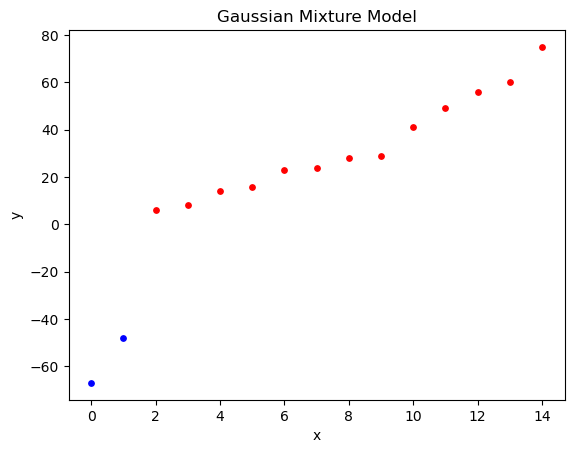

means = [[ 32.98488749 -57.51107674]]
covariances = [[429.45833107  90.24987868]]
weights =  [[0.86682772 0.13317228]]


In [30]:
for i in range(0, len(labels)):
    if labels[i] == 0:
        plt.scatter(i, data.take(i), s=15, c='red')
    elif labels[i] == 1:
        plt.scatter(i, data.take(i), s=15, c='blue')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("means =", gmmModel.means_.reshape(1, -1))
print("covariances =", gmmModel.covariances_.reshape(1, -1))
print("weights = ", gmmModel.weights_.reshape(1, -1))

### 习题9.4
&emsp;&emsp;EM算法可以用到朴素贝叶斯法的非监督学习，试写出其算法。

**解答：** 
> **EM算法的一般化：**  
**E步骤：**根据参数初始化或上一次迭代的模型参数来计算出隐变量的后验概率，其实就是隐变量的期望。作为隐变量的现估计值：$$w_j^{(i)}=Q_{i}(z^{(i)}=j) := p(z^{(i)}=j | x^{(i)} ; \theta)$$
**M步骤：**将似然函数最大化以获得新的参数值：$$
\theta :=\arg \max_{\theta} \sum_i \sum_{z^{(i)}} Q_i (z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)} ; \theta)}{Q_i (z^{(i)})}
$$  

使用NBMM（朴素贝叶斯的混合模型）中的$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数替换一般化的EM算法中的$\theta$参数，然后依次求解$w_j^{(i)}$与$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数的更新问题。  
**NBMM的EM算法：**  
**E步骤：**  
$$w_j^{(i)}:=P\left(z^{(i)}=1 | x^{(i)} ; \phi_z, \phi_{j | z^{(i)}=1}, \phi_{j | z^{(i)}=0}\right)$$**M步骤：**$$
\phi_{j | z^{(i)}=1} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)} I(x_{j}^{(i)}=1)}{\displaystyle \sum_{i=1}^{m} w^{(i)}} \\ 
\phi_{j | z^{(i)}=0}:= \frac{\displaystyle  \sum_{i=1}^{m}\left(1-w^{(i)}\right) I(x_{j}^{(i)}=1)}{ \displaystyle \sum_{i=1}^{m}\left(1-w^{(i)}\right)} \\ 
\phi_{z^{(i)}} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)}}{m} 
$$   

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)